# Introduction to Logistic Regression:

### Importing Libraries:

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read Dataset:

In [58]:
df=pd.read_excel('insurance_data.xlsx')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [59]:
df.shape

(27, 2)

### Checking for null values and duplicates:

In [60]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [61]:
df.duplicated().sum()

1

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.shape

(26, 2)

### Splitting the dataset:

In [64]:
x=df[['age']]
y=df['bought_insurance']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19, 1)
(7, 1)
(19,)
(7,)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

In [68]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [69]:
print('Training Score',model1.score(x_train,y_train)) #accuracy
print('Testing Score',model1.score(x_test,y_test))

Training Score 0.8947368421052632
Testing Score 0.8571428571428571


In [70]:
ypred1=model1.predict(x_test)
print('ypred1',ypred1)

ypred1 [1 0 0 0 1 0 1]


In [71]:
cm1=confusion_matrix(y_test,ypred1)
print(cm1)
print(classification_report(y_test,ypred1))

[[4 1]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7



In [72]:
print(accuracy_score(y_test,ypred1))
print('Testing Score',model1.score(x_test,y_test))

0.8571428571428571
Testing Score 0.8571428571428571


In [73]:
m=model1.coef_
c=model1.intercept_
print('Coefficients',m)
print('Intercept',c)

Coefficients [[0.1345592]]
Intercept [-4.66697383]


### Create a function to implement Sigmoid Function

In [74]:
def sigmoid(m,c,x):
    sig=1/(1+np.exp(-((m*x)+c)))
    print(sig)

In [75]:
sigmoid(m,c,50)

[[0.88705303]]


In [76]:
ypred59=model1.predict([[59]])
print('ypred59',ypred59)
sigmoid(m,c,59)

ypred59 [1]
[[0.96345633]]


In [77]:
ypred25=model1.predict([[25]])
print('ypred25',ypred25)
sigmoid(m,c,25)

ypred25 [0]
[[0.21366161]]


In [78]:
res=model1.predict_proba(x_test)
print(res)

[[0.0886602  0.9113398 ]
 [0.8280845  0.1719155 ]
 [0.76286193 0.23713807]
 [0.68238562 0.31761438]
 [0.12714657 0.87285343]
 [0.84640404 0.15359596]
 [0.03209051 0.96790949]]


In [79]:
print(ypred1) #compare it with res to find which value is higher 1 or 0

[1 0 0 0 1 0 1]


In [80]:
auc_score=roc_auc_score(y_test,model1.predict_proba(x_test)[:,1])
print('auc_score',auc_score)

auc_score 0.9


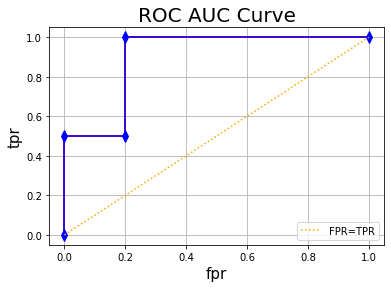

In [84]:
fpr,tpr,threshold=roc_curve(y_test,model1.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='red')
plt.plot(fpr,tpr,color='blue',marker='d',markersize=8)
plt.plot([0,1],[0,1],label='FPR=TPR',color='orange',linestyle=':')
plt.title('ROC AUC Curve',size=20)
plt.xlabel('fpr', size=15)
plt.ylabel('tpr', size=15)
plt.legend()
plt.grid()
plt.show()

In [83]:
print(fpr)
print(tpr)
print(threshold)

[0.  0.  0.2 0.2 1. ]
[0.  0.5 0.5 1.  1. ]
[1.96790949 0.96790949 0.9113398  0.87285343 0.15359596]
